In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('German-Data.csv')



In [3]:
data.head()


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

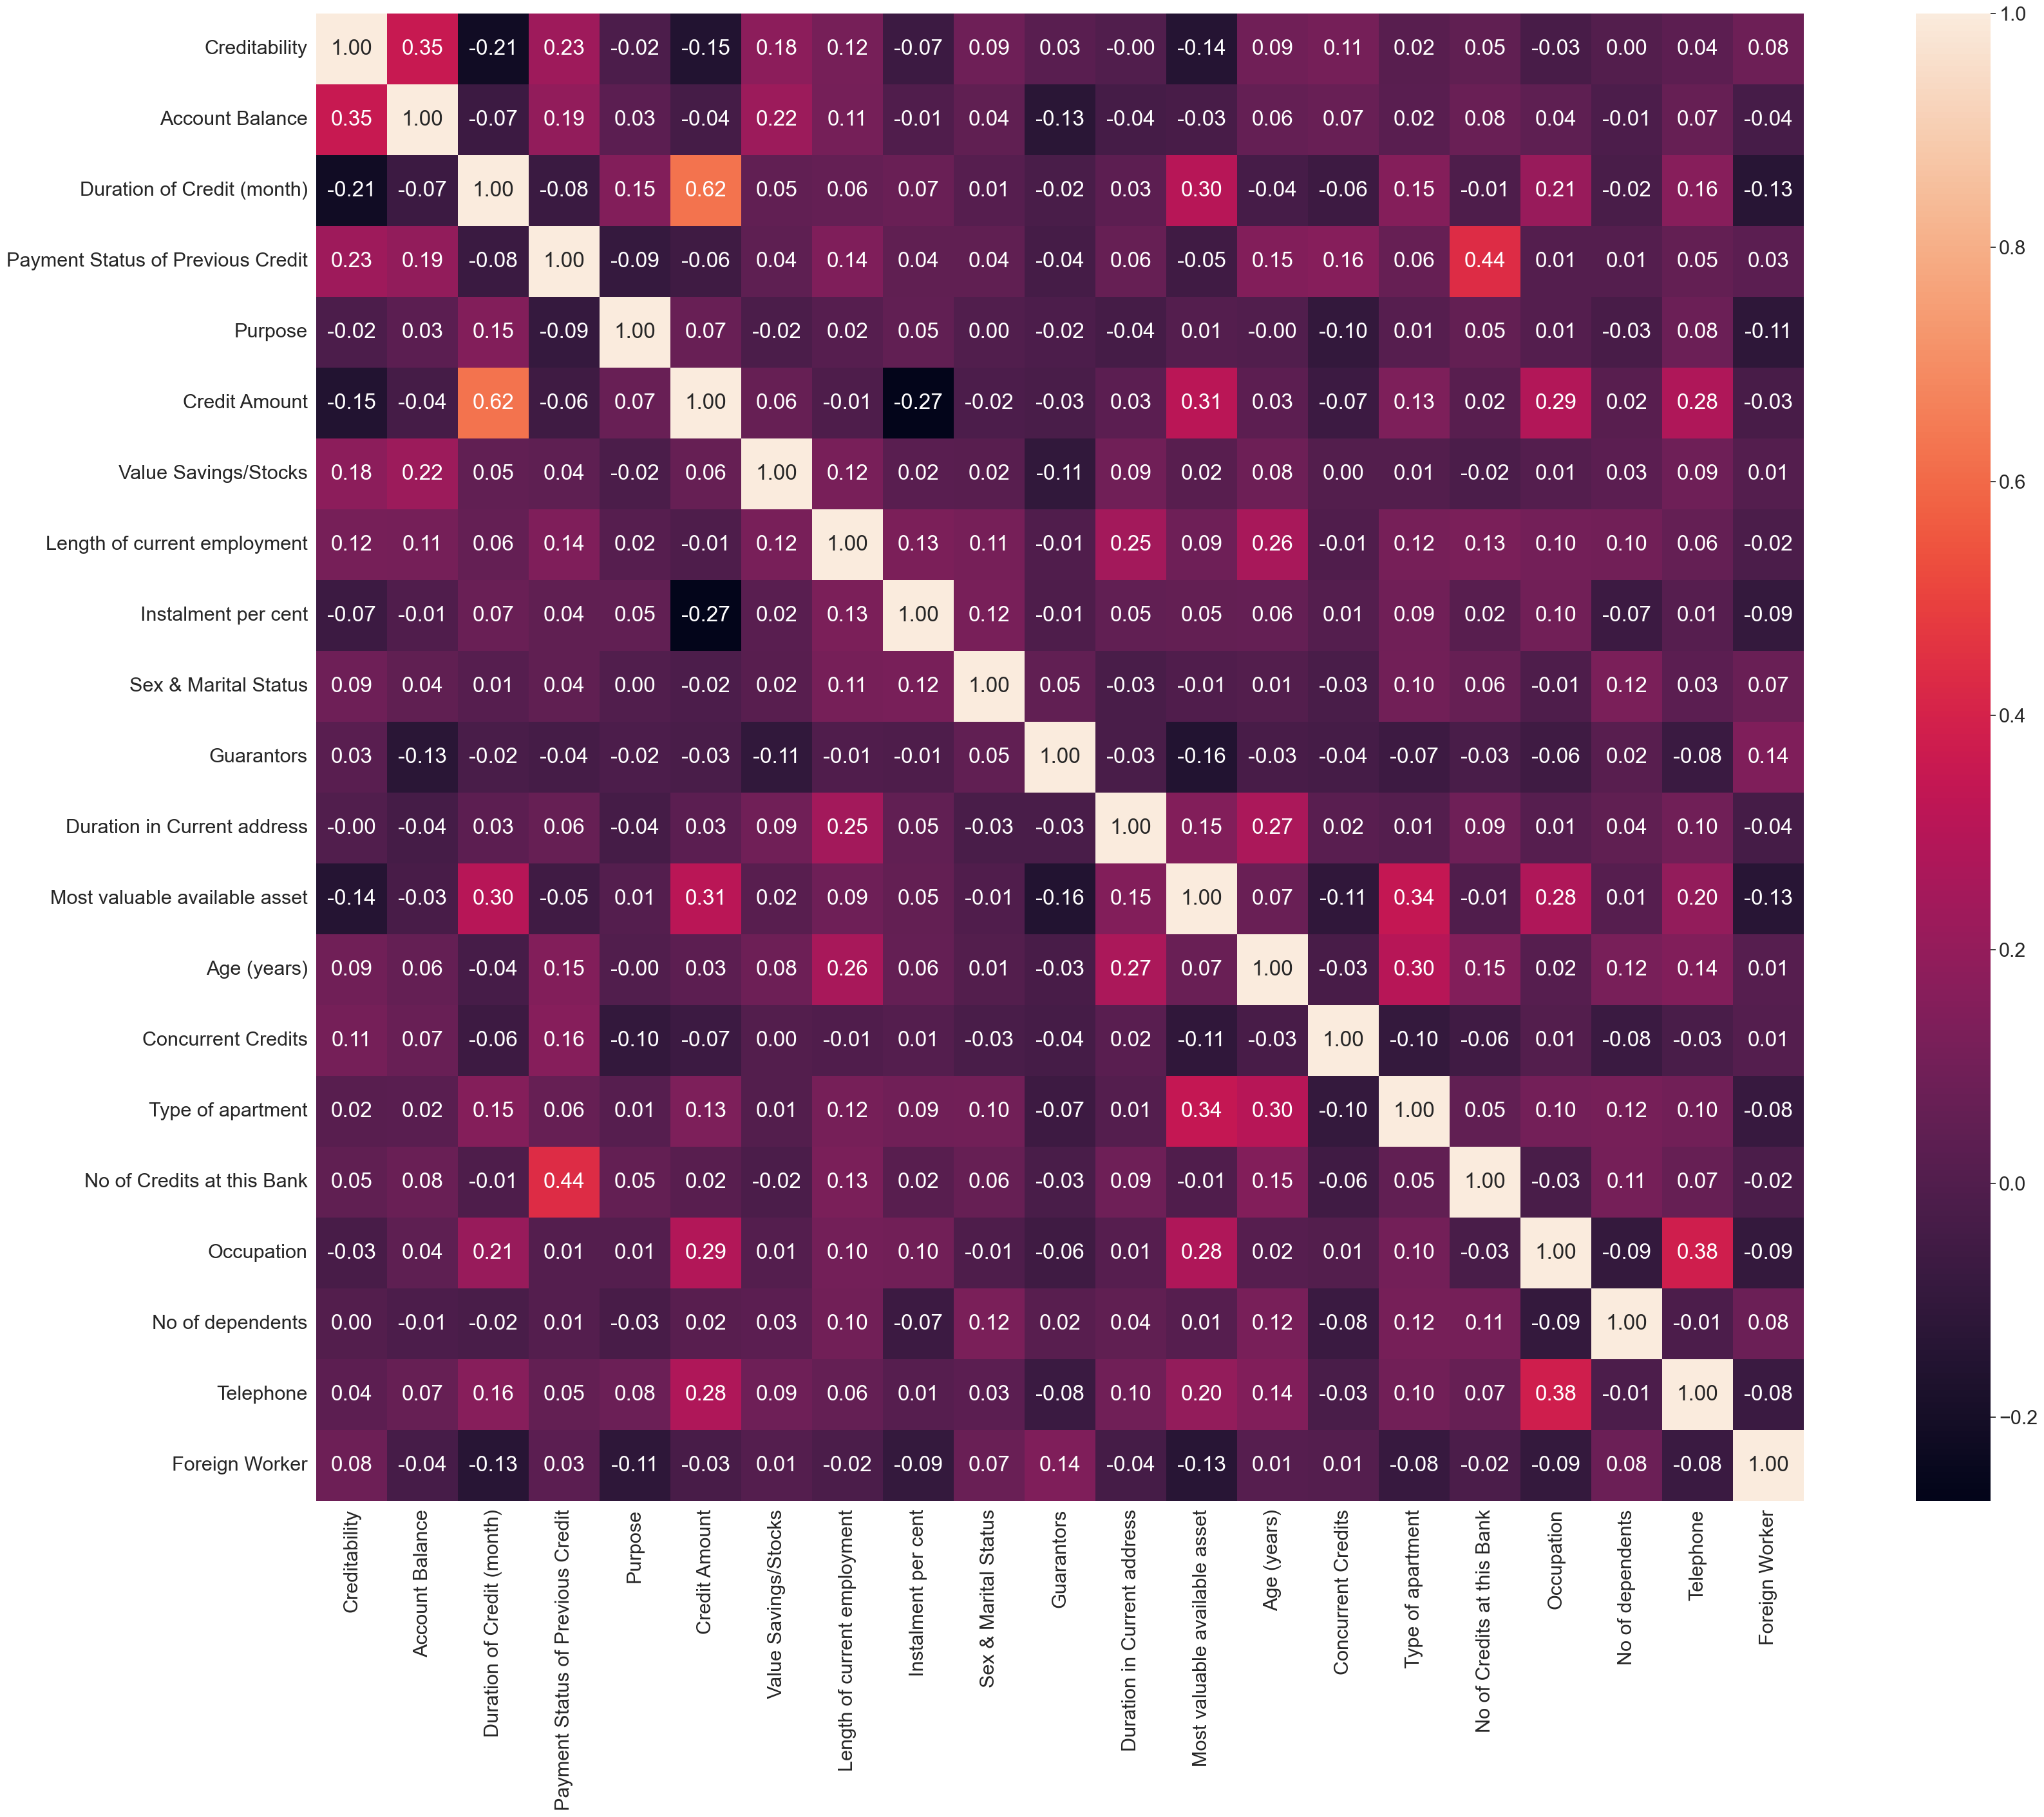

In [5]:
plt.figure(figsize=(45,30))
sns.set(font_scale=2) 
sns.heatmap(data.corr(),cbar=True, annot=True, square=True ,fmt='.2f',cmap="rocket")
plt.show()

In [6]:
maping_list = {1:'<0 DM', 
               2:'0~200 DM',
               3:'>=200 DM',
               4:'No account'
               }
data['Account Balance'] = data['Account Balance'].map(maping_list)


maping_list = {0:'no credits taken / all credits paid back duly', 
               1:'all credits at this bank paid back duly',
               2:'existing credits paid back duly till now',
               3:'delay in paying off in the past',
               4:'critical account / other credits existing (not at this bank)'
               }
data['Payment Status of Previous Credit'] = data['Payment Status of Previous Credit'].map(maping_list)

maping_list = {0:'car (new)', 
               1:'car (used)',
               2:'furniture/equipment',
               3:'radio/television',
               4:'domestic appliances',
               5:'repairs',
               6:'education',
               7:'vacation',
               8:'retraining',
               9:'business',
               10:'others',
               }
data['Purpose'] = data['Purpose'].map(maping_list)

maping_list = {1:'<100 DM', 
               2:'100~500 DM',
               3:'500~1000 DM',
               4:'>=1000 DM',
               5:'unknown/ no savings account'
               }
data['Value Savings/Stocks'] = data['Value Savings/Stocks'].map(maping_list)

maping_list = {1:'unemployed', 
               2:'< 1 year',
               3:'1~4 year',
               4:'4~7 year',
               5:'>= 7 year'
               }
data['Length of current employment'] = data['Length of current employment'].map(maping_list)

maping_list = {1:'male: divorced/separated/married', 
               2:'female: divorced/separated/married',
               3:'male: single',
               4:'female: single',
               }
data['Sex & Marital Status'] = data['Sex & Marital Status'].map(maping_list)

maping_list = {1:'none', 
               2:'co-applicant',
               3:'guarantor',
               }
data['Guarantors'] = data['Guarantors'].map(maping_list)

maping_list = {1:'real estate', 
               2:'building society savings agreement/life insurance',
               3:'car or other',
               4:'unknown/no property'
               }
data['Most valuable available asset'] = data['Most valuable available asset'].map(maping_list)

maping_list = {1:'bank', 
               2:'stores',
               3:'none',
               }
data['Concurrent Credits'] = data['Concurrent Credits'].map(maping_list)

maping_list = {1:'rent', 
               2:'own',
               3:'for free',
               }
data['Type of apartment'] = data['Type of apartment'].map(maping_list)

maping_list = {1:'unemployed', 
               2:'unskilled-resident',
               3:'skilled employee/official',
               4:'management/self-employed/highly qualified employee/officer',
               }
data['Occupation'] = data['Occupation'].map(maping_list)

maping_list = {1:'none', 
               2:'yes',
               }
data['Telephone'] = data['Telephone'].map(maping_list)

maping_list = {1:'yes', 
               2:'no',
               }
data['Foreign Worker'] = data['Foreign Worker'].map(maping_list)

maping_list = {1:'Low Credit Risk', 
               0:'High Credit Risk',
               }
data['Creditability'] = data['Creditability'].map(maping_list)


In [7]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,Low Credit Risk,<0 DM,18,critical account / other credits existing (not...,furniture/equipment,1049,<100 DM,< 1 year,4,female: divorced/separated/married,...,4,building society savings agreement/life insurance,21,none,rent,1,skilled employee/official,1,none,yes
1,Low Credit Risk,<0 DM,9,critical account / other credits existing (not...,car (new),2799,<100 DM,1~4 year,2,male: single,...,2,real estate,36,none,rent,2,skilled employee/official,2,none,yes
2,Low Credit Risk,0~200 DM,12,existing credits paid back duly till now,business,841,100~500 DM,4~7 year,2,female: divorced/separated/married,...,4,real estate,23,none,rent,1,unskilled-resident,1,none,yes
3,Low Credit Risk,<0 DM,12,critical account / other credits existing (not...,car (new),2122,<100 DM,1~4 year,3,male: single,...,2,real estate,39,none,rent,2,unskilled-resident,2,none,no
4,Low Credit Risk,<0 DM,12,critical account / other credits existing (not...,car (new),2171,<100 DM,1~4 year,4,male: single,...,4,building society savings agreement/life insurance,38,bank,own,2,unskilled-resident,1,none,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account Balance                    1000 non-null   object
 2   Duration of Credit (month)         1000 non-null   int64 
 3   Payment Status of Previous Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit Amount                      1000 non-null   int64 
 6   Value Savings/Stocks               1000 non-null   object
 7   Length of current employment       1000 non-null   object
 8   Instalment per cent                1000 non-null   int64 
 9   Sex & Marital Status               1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration in Current address        1000 non-null   int64 
 12  Most va

Text(0.5, 1.0, 'Correlation between Account Balance and Creditability')

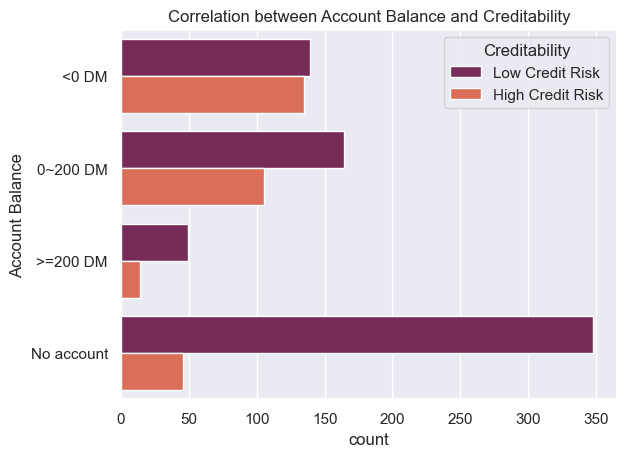

In [9]:
sns.set(font_scale=1) 
order =['<0 DM','0~200 DM','>=200 DM','No account']
sns.countplot(data=data, y='Account Balance',hue='Creditability',order=order,palette="rocket")
plt.title('Correlation between Account Balance and Creditability')


Text(0.5, 1.0, 'Density between Duration of Credit (month) and Creditability')

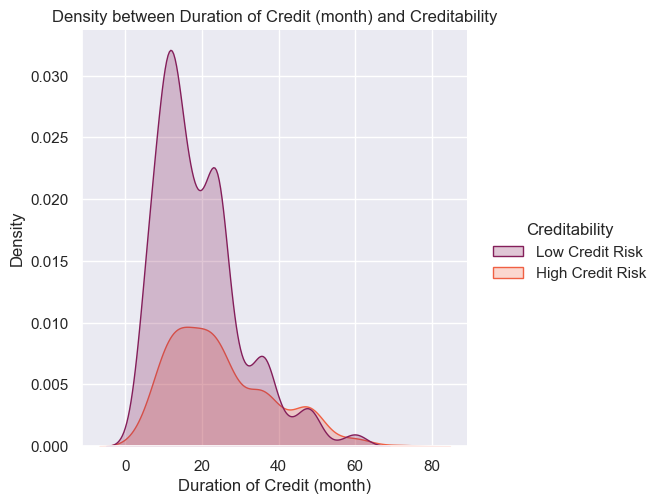

In [10]:
sns.set(font_scale=1) 
sns.displot(data=data, x="Duration of Credit (month)", hue="Creditability",kind='kde',fill=True,palette="rocket")
plt.title('Density between Duration of Credit (month) and Creditability')

Text(0.5, 1.0, 'Correlation between Payment Status of Previous Credit and Creditability')

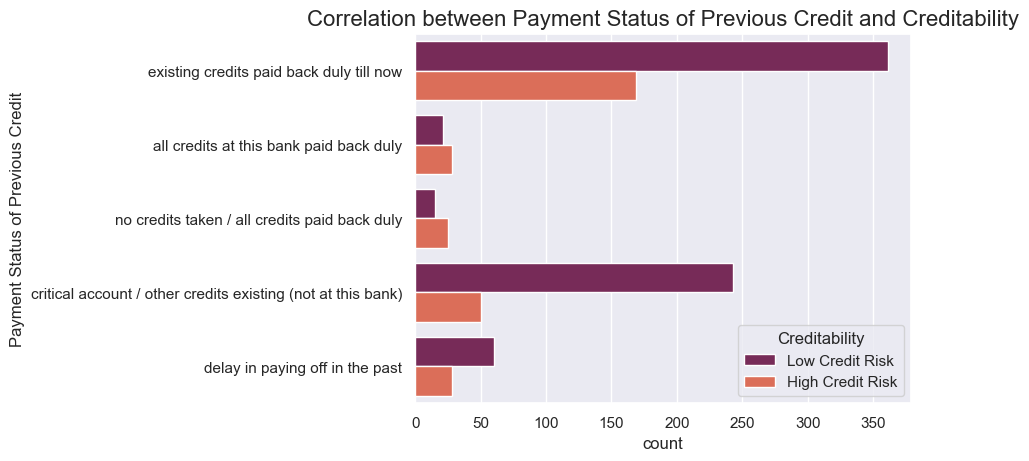

In [11]:
sns.set(font_scale=1) 
order =['existing credits paid back duly till now','all credits at this bank paid back duly','no credits taken / all credits paid back duly','critical account / other credits existing (not at this bank)','delay in paying off in the past']
sns.countplot(data=data, y='Payment Status of Previous Credit',hue='Creditability',order=order,palette="rocket")
plt.title('Correlation between Payment Status of Previous Credit and Creditability',fontsize=16)


Text(0.5, 1.0, 'Correlation between Value Savings/Stocks and Account Balance')

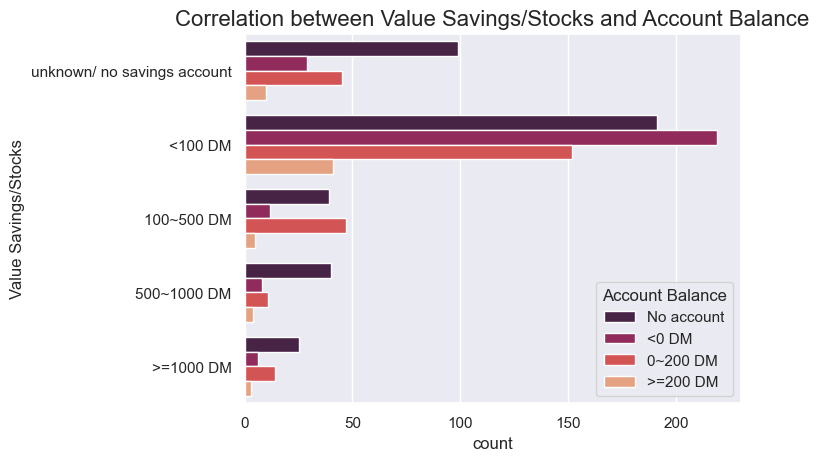

In [12]:
sns.set(font_scale=1) 
order =['unknown/ no savings account','<100 DM','100~500 DM','500~1000 DM','>=1000 DM']
hue_order =['No account','<0 DM','0~200 DM','>=200 DM']
sns.countplot(data=data, y='Value Savings/Stocks',hue='Account Balance',palette="rocket",order=order,hue_order=hue_order)
plt.title('Correlation between Value Savings/Stocks and Account Balance',fontsize=16)


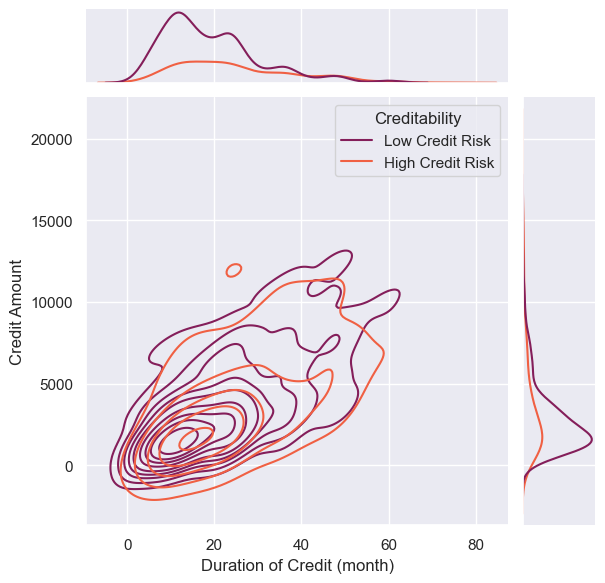

In [13]:
sns.jointplot(data=data,x="Duration of Credit (month)", y="Credit Amount", hue="Creditability",kind="kde",palette="rocket")


Text(0.5, 1.0, 'Correlation between Most valuable available asset and Duration of Credit')

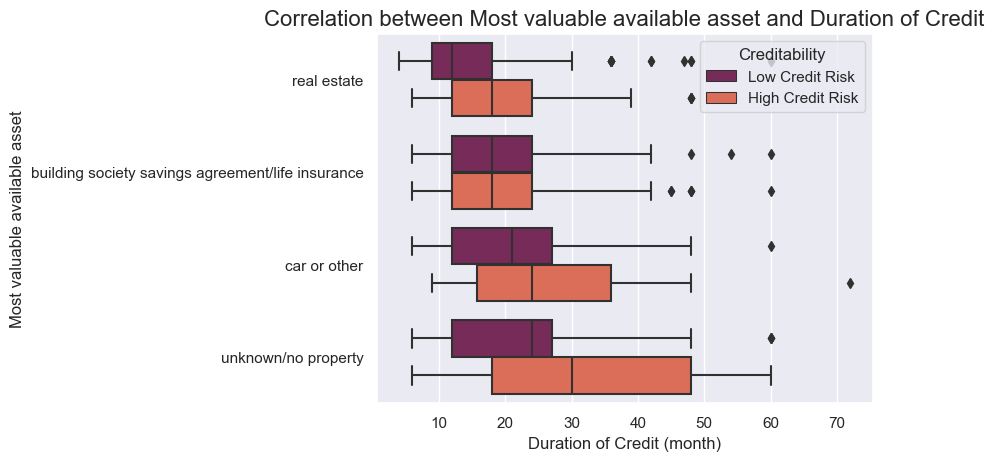

In [14]:
order=['real estate','building society savings agreement/life insurance','car or other','unknown/no property']
sns.boxplot(data=data,y='Most valuable available asset',x='Duration of Credit (month)',hue="Creditability",order=order,palette="rocket")
plt.title('Correlation between Most valuable available asset and Duration of Credit',fontsize=16)

Text(0.5, 1.0, 'Correlation between No of Credits at this Bank and Payment Status of Previous Credit')

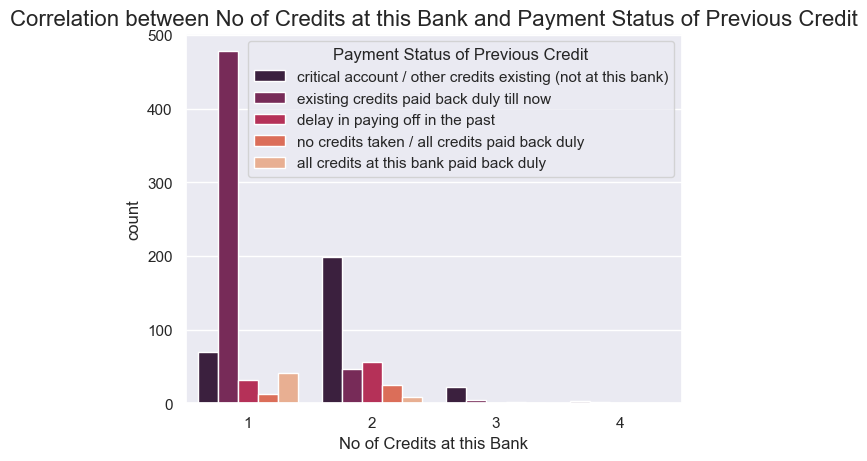

In [15]:
sns.set(font_scale=1) 
sns.countplot(data=data, x="No of Credits at this Bank", hue="Payment Status of Previous Credit",palette="rocket")
plt.title('Correlation between No of Credits at this Bank and Payment Status of Previous Credit',fontsize=16)

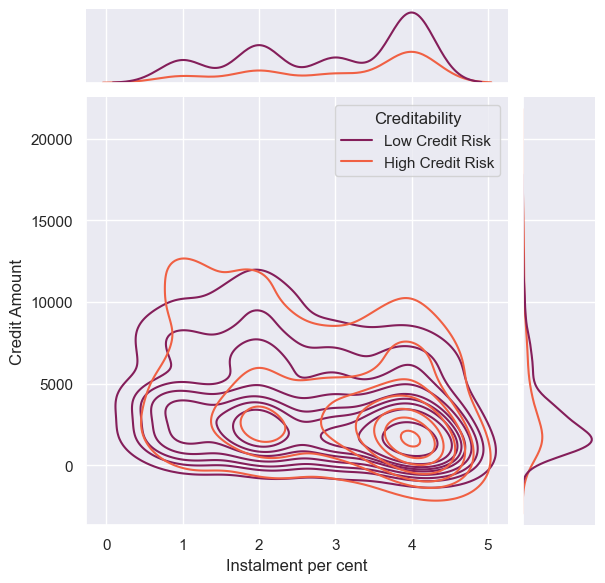

In [16]:
sns.jointplot(data=data,x="Instalment per cent", y="Credit Amount", hue="Creditability",kind="kde",palette="rocket")

Text(0.5, 1.0, 'Correlation between Instalment per cent and Credit Amount')

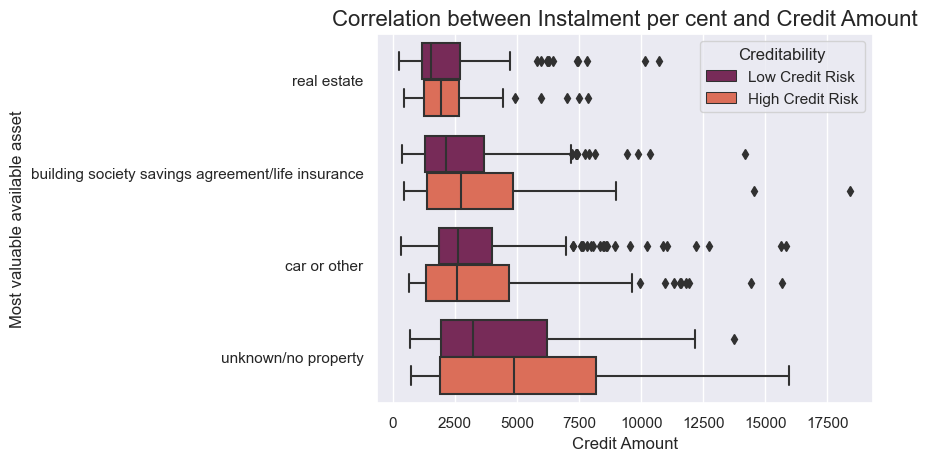

In [17]:
order=['real estate','building society savings agreement/life insurance','car or other','unknown/no property']
sns.boxplot(data=data,y='Most valuable available asset',x='Credit Amount',hue="Creditability",order=order,palette="rocket")
plt.title('Correlation between Instalment per cent and Credit Amount',fontsize=16)

Text(0.5, 1.0, 'Correlation between Occupation and Credit Amount')

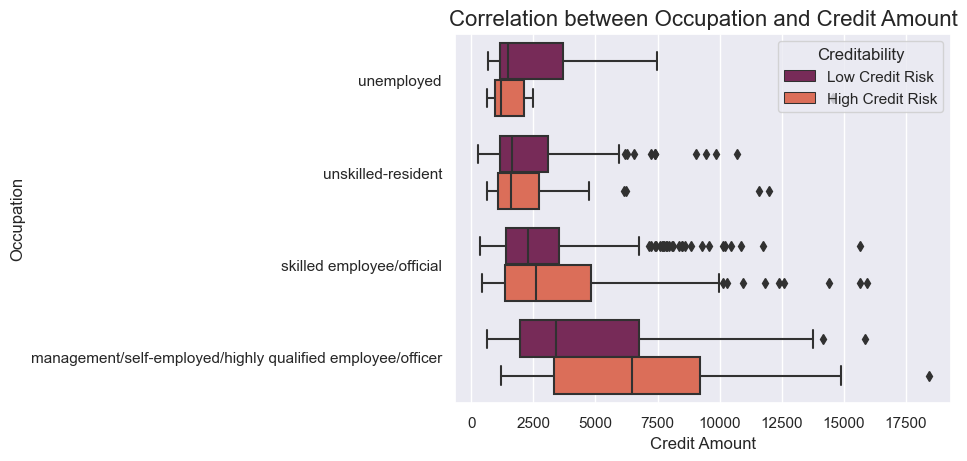

In [18]:
order=['unemployed','unskilled-resident','skilled employee/official','management/self-employed/highly qualified employee/officer']
sns.boxplot(data=data,y='Occupation',x='Credit Amount',hue="Creditability",order=order,palette="rocket")
plt.title('Correlation between Occupation and Credit Amount',fontsize=16)

Text(0.5, 1.0, 'Correlation between Most valuable available asset and type of apartment')

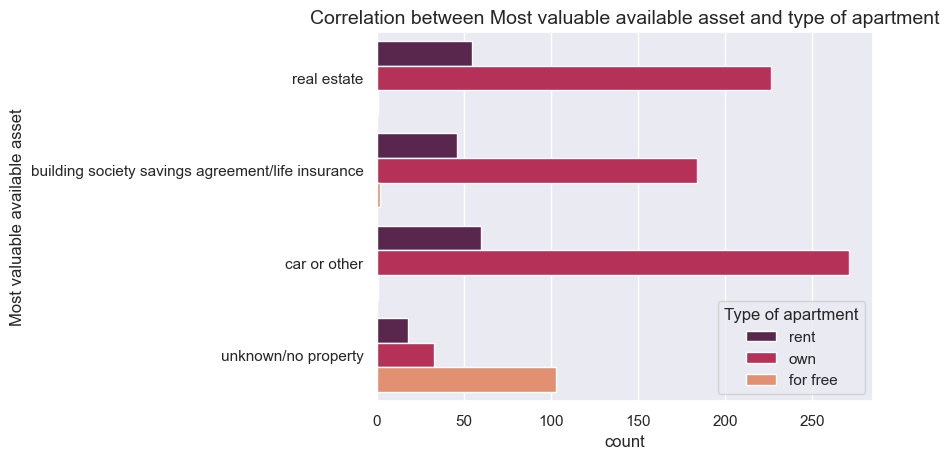

In [19]:
sns.set(font_scale=1) 
order =['real estate','building society savings agreement/life insurance','car or other','unknown/no property']
sns.countplot(data=data, y='Most valuable available asset',hue='Type of apartment',palette="rocket",order=order)
plt.title('Correlation between Most valuable available asset and type of apartment',fontsize=14)


Text(0.5, 1.0, 'Correlation between Value Savings/Stocks and Account Balance')

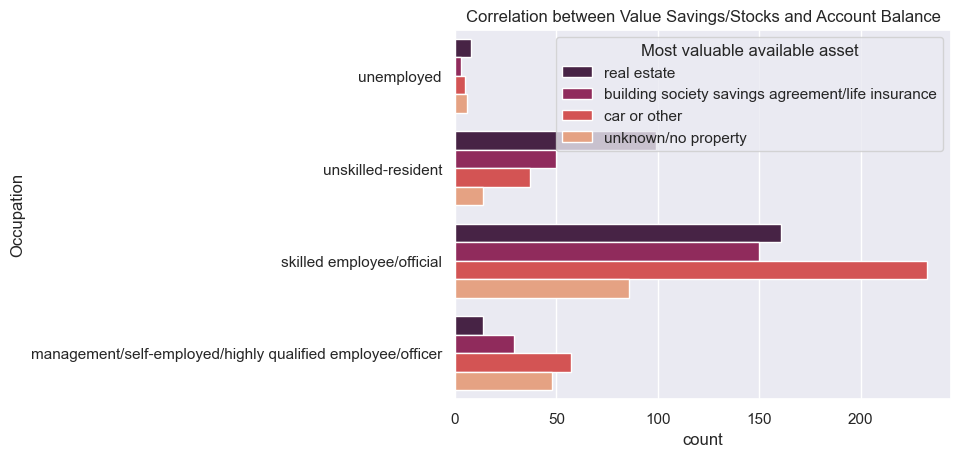

In [20]:
sns.set(font_scale=1)
order=['unemployed','unskilled-resident','skilled employee/official','management/self-employed/highly qualified employee/officer'] 
hue_order =['real estate','building society savings agreement/life insurance','car or other','unknown/no property']
sns.countplot(data=data, hue='Most valuable available asset',y='Occupation',palette="rocket",hue_order=hue_order,order=order)
plt.title('Correlation between Value Savings/Stocks and Account Balance')


Text(0.5, 1.0, 'Density between Age (years) and Type of apartment')

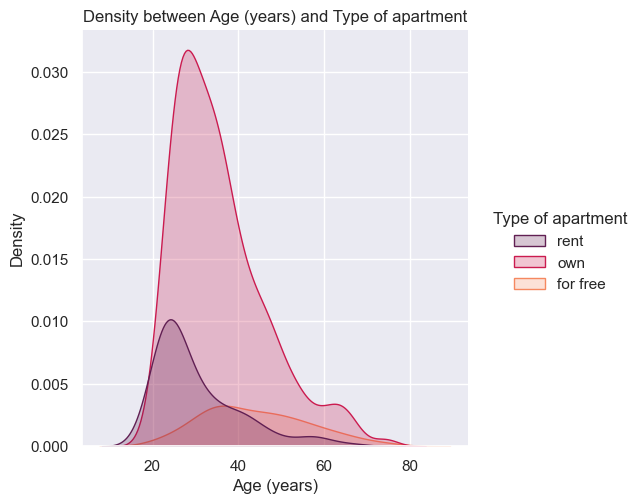

In [21]:

sns.displot(data=data,hue="Type of apartment", x="Age (years)",kind='kde', fill=True,palette="rocket")
plt.title('Density between Age (years) and Type of apartment')

In [22]:
corr = data.copy()

le1 = LabelEncoder()
le1.fit(corr['Account Balance'])
corr['Account Balance'] = le1.transform(corr['Account Balance'])

le2 = LabelEncoder()
le2.fit(corr['Payment Status of Previous Credit'])
corr['Payment Status of Previous Credit'] = le2.transform(corr['Payment Status of Previous Credit'])

le3 = LabelEncoder()
le3.fit(corr['Purpose'])
corr['Purpose'] = le3.transform(corr['Purpose'])

le4 = LabelEncoder()
le4.fit(corr['Value Savings/Stocks'])
corr['Value Savings/Stocks'] = le4.transform(corr['Value Savings/Stocks'])

le5 = LabelEncoder()
le5.fit(corr['Length of current employment'])
corr['Length of current employment'] = le5.transform(corr['Length of current employment'])

le6 = LabelEncoder()
le6.fit(corr['Sex & Marital Status'])
corr['Sex & Marital Status'] = le6.transform(corr['Sex & Marital Status'])

le7 = LabelEncoder()
le7.fit(corr['Guarantors'])
corr['Guarantors'] = le7.transform(corr['Guarantors'])

le8 = LabelEncoder()
le8.fit(corr['Most valuable available asset'])
corr['Most valuable available asset'] = le8.transform(corr['Most valuable available asset'])

le9 = LabelEncoder()
le9.fit(corr['Concurrent Credits'])
corr['Concurrent Credits'] = le9.transform(corr['Concurrent Credits'])

le10 = LabelEncoder()
le10.fit(corr['Type of apartment'])
corr['Type of apartment'] = le10.transform(corr['Type of apartment'])

le11 = LabelEncoder()
le11.fit(corr['Occupation'])
corr['Occupation'] = le11.transform(corr['Occupation'])

le12 = LabelEncoder()
le12.fit(corr['Telephone'])
corr['Telephone'] = le12.transform(corr['Telephone'])

le13 = LabelEncoder()
le13.fit(corr['Foreign Worker'])
corr['Foreign Worker'] = le13.transform(corr['Foreign Worker'])

le14 = LabelEncoder()
le14.fit(corr['Creditability'])
corr['Creditability'] = le14.transform(corr['Creditability'])


In [23]:
X=corr.iloc[:,1:]
y=corr['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [24]:
scaler = RobustScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [25]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
features_list = []
scores_list = []
for i in range(len(fs.scores_)):
 features_list.append(corr.iloc[:,1:].columns[i])
 scores_list.append(fs.scores_[i])

In [26]:
df_features = pd.DataFrame({'Features': features_list, 'Scores': scores_list})

In [27]:
df_features = df_features.sort_values(by=['Scores'],ascending=False)

Text(0.5, 1.0, 'ANOVA P value')

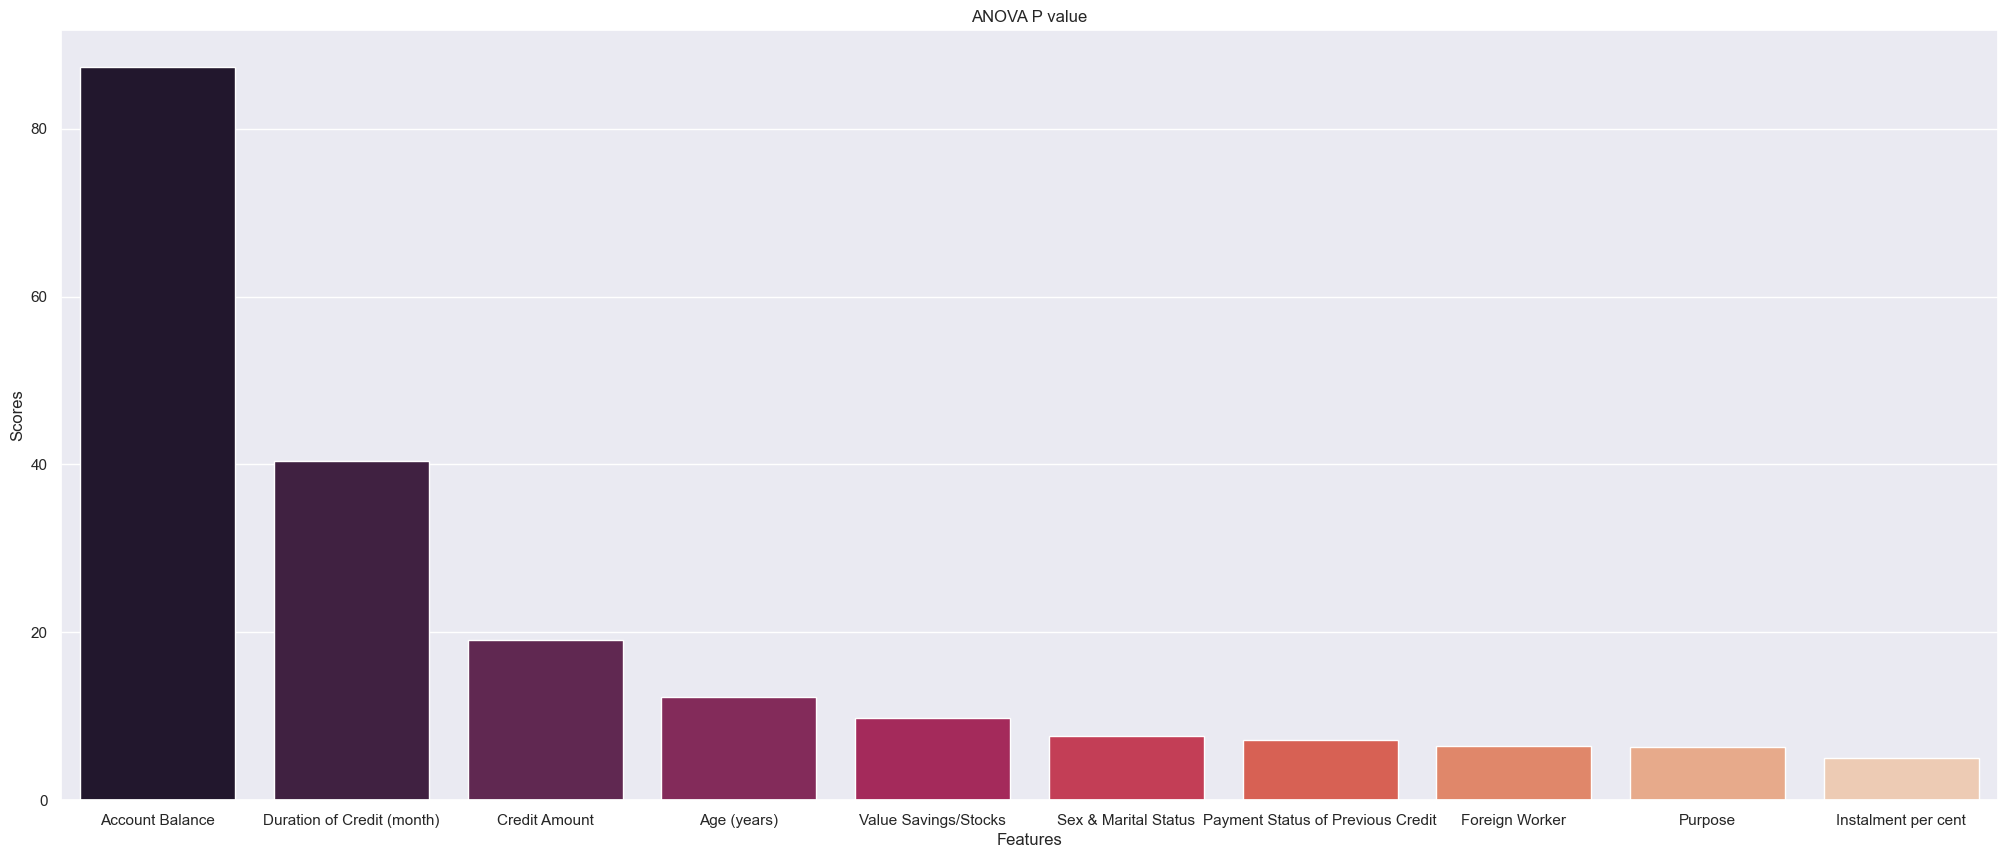

In [28]:
sns.set(font_scale=1)
plt.figure(figsize=(25,10))
sns.barplot(x='Features', y='Scores', data=df_features[0:10],palette="rocket")
plt.title("ANOVA P value")

In [29]:
df_features['Features'][0:10]

0                       Account Balance
1            Duration of Credit (month)
4                         Credit Amount
12                          Age (years)
5                  Value Savings/Stocks
8                  Sex & Marital Status
2     Payment Status of Previous Credit
19                       Foreign Worker
3                               Purpose
7                   Instalment per cent
Name: Features, dtype: object

In [30]:
X=corr.loc[:,['Account Balance',
'Duration of Credit (month)','Credit Amount','Age (years)','Value Savings/Stocks','Sex & Marital Status',
'Payment Status of Previous Credit',
'Foreign Worker','Purpose','Instalment per cent']]
y=corr['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = RobustScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
Runtime = []

In [31]:
start = time.time()

logr = LogisticRegression()
param_grid_logr = [
    {'penalty':['l2','elasticnet','none'],
    'C':[0.001, 0.01, 0.1,1,10,100],
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'multi_class':['auto','ovr','multinomial'],
    'class_weight':['balanced']
    }
]
param_logr = GridSearchCV(logr, param_grid = param_grid_logr, cv = 3, verbose=True,scoring='f1')
best_param_logr = param_logr.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)

print("The best parameters for logistic regression",best_param_logr.best_params_)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
The best parameters for logistic regression {'C': 0.001, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}


In [32]:
logr = LogisticRegression(C = 0.001 ,multi_class='auto',penalty='l2',solver='lbfgs',class_weight='balanced')
logr.fit(X_train,y_train)
logr_Prediction = logr.predict(X_test)
Accuracy_Logistic = accuracy_score(y_test,logr_Prediction)
print("The accuracy score of logisitc regression is:",Accuracy_Logistic)

The accuracy score of logisitc regression is: 0.77


In [33]:
start = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_Prediction = gnb.predict(X_test)
Accuracy_NaiveBayes = accuracy_score(y_test,gnb_Prediction)
end = time.time()
Runtime.append(end - start)
print("The accuracy score of Naive Bayes Classifier is:",Accuracy_NaiveBayes)


The accuracy score of Naive Bayes Classifier is: 0.7


In [34]:
start = time.time()
svm = SVC()
param_grid_svm = [
    {
    'kernel':['rbf','linear','sigmoid'],
    'gamma':['scale', 'auto'],
    'class_weight':['dict' , 'balanced'],
    'decision_function_shape':['ovo', 'ovr'],
    }
]
param_svm = GridSearchCV(svm, param_grid = param_grid_svm, cv = 3, verbose=True,scoring="f1")
best_param_svm = param_svm.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for support vector machine",best_param_svm.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The best parameters for support vector machine {'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


In [37]:
svm = SVC(kernel='rbf',class_weight='balanced',decision_function_shape='ovo',gamma='scale')
svm.fit(X_train, y_train)
svm_Prediction = svm.predict(X_test)
Accuracy_SVM = accuracy_score(y_test,svm_Prediction)
print("The accuracy score of support vector machine is:",Accuracy_SVM)

The accuracy score of support vector machine is: 0.74


In [36]:
start = time.time()
rf = RandomForestClassifier()
param_grid_rf = [
    {'n_estimators':[100,200,400,600],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None],
    'class_weight':['balanced', 'balanced_subsample'],
    'random_state':[42],
    }
]
param_rf = GridSearchCV(rf, param_grid = param_grid_rf, cv = 3, verbose=True,scoring="f1")
best_param_rf = param_rf.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for random forest",best_param_rf.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
The best parameters for support vector machine {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [38]:
rf_Model = RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='sqrt',n_estimators=200,random_state=42)
rf_Model.fit(X_train, y_train)
rf_Prediction = rf_Model.predict(X_test)
Accuracy_RandomForest = accuracy_score(y_test,rf_Prediction)
print("The accuracy score of random forest is:",Accuracy_RandomForest)

The accuracy score of random forest is: 0.76


In [39]:
start = time.time()
gb = GradientBoostingClassifier()
param_grid_gb = [
    {
    'loss':['log_loss', 'deviance', 'exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,400,600,800],
    'subsample':[0.0,0.5,1],
    'criterion':['friedman_mse', 'squared_error', 'mse'],
    }
]
param_gb = GridSearchCV(gb, param_grid = param_grid_gb, cv = 3, verbose=True,scoring="f1")
best_param_gb = param_gb.fit(X_train,y_train)
end = time.time()
Runtime.append(end - start)
print("The best parameters for Gradient Boosting",best_param_gb.best_params_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
The best parameters for Gradient Boosting {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 200, 'subsample': 0.5}


In [40]:
print("The best parameters for Gradient Boosting",best_param_gb.best_params_)

The best parameters for Gradient Boosting {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 200, 'subsample': 0.5}


In [41]:
gb_Model = GradientBoostingClassifier(criterion = 'squared_error',learning_rate=0.01, loss='deviance',n_estimators=200,subsample=0.5)
gb_Model.fit(X_train, y_train)
gb_Prediction = gb_Model.predict(X_test)
Accuracy_gb = accuracy_score(y_test,gb_Prediction)
print("The accuracy score of Gradient Boosting is:",Accuracy_gb)

The accuracy score of Gradient Boosting is: 0.74


In [42]:
model_list = ['Logistic Regression', 'Naive Bayes','Support Vector Machine','Random forest','Gradient Boosting']
accuracy_list = [Accuracy_Logistic, Accuracy_NaiveBayes, Accuracy_SVM, Accuracy_RandomForest, Accuracy_gb]
df_models = pd.DataFrame({'Machine Learning Models': model_list, 'Accuracy': accuracy_list, 'Training Time (s)': Runtime})

In [43]:
df_models

,Machine Learning Models,Accuracy,Training Time (s)
0,Logistic Regression,0.77,7.200202
1,Naive Bayes,0.70,0.008404
2,Support Vector Machine,0.74,2.331094
3,Random forest,0.76,310.272295
4,Gradient Boosting,0.74,456.390826
